# Plotting Electronic Structure

Let's begin by plotting the bandstructure of a material. 

In [1]:
from pymatgen.matproj.rest import MPRester
mpr = MPRester('SoC2ibVrNZ80M5v9')

Go onto materials project and find a material that has a bandstructure
Then we'll grab the bandstructure object for that material

In [2]:
from pymatgen.electronic_structure.plotter import BSPlotter, DosPlotter
from pymatgen.electronic_structure.core import OrbitalType

bs = mpr.get_bandstructure_by_material_id("mp-2657")
print(bs)


Notice that the pymatgen rest module gave us a BandStructureSymmLine object
This is a specific type of bandstructure object that traces an important path in the BZ to identify properties such as the band gap

Let's check the band gap

In [3]:
print(bs.get_band_gap())

{'direct': True, 'transition': '\\Gamma-\\Gamma', 'energy': 1.7809999999999997}


Now, let's plot the bandstructure

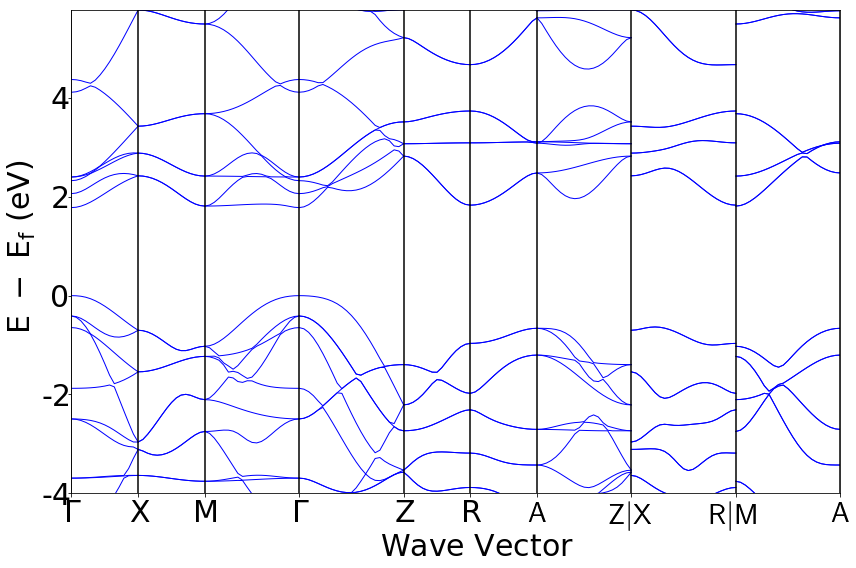

In [4]:
plotter=BSPlotter(bs)
plotter.get_plot().show()

Sometimes it's usefull to visualize what this path is

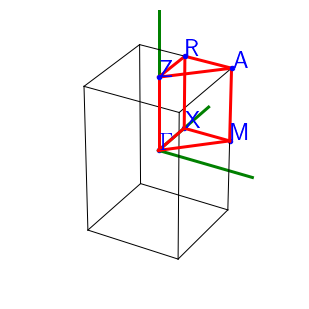

In [5]:
plotter.plot_brillouin()


There is a similar method to get the density of states for a material


In [6]:
dos = mpr.get_dos_by_material_id("mp-2657")
print(dos)

Complete DOS for Full Formula (Ti2 O4)
Reduced Formula: TiO2
abc   :   4.651784   4.651784   2.969914
angles:  90.000000  90.000000  90.000000
Sites (6)
  #  SP           a         b    c
---  ----  --------  --------  ---
  0  Ti    0.5       0.5       0.5
  1  Ti    0         0         0
  2  O     0.695089  0.695089  0
  3  O     0.195089  0.804911  0.5
  4  O     0.304911  0.304911  0
  5  O     0.804911  0.195089  0.5


Let's now get the elemental components. This is TiO2, so there is a DOS for Ti and a DOS for O

In [7]:
dos_elemns = dos.get_element_dos()
print(dos_elemns)

{Element O: <pymatgen.electronic_structure.dos.Dos object at 0x7f9f90bdc198>, Element Ti: <pymatgen.electronic_structure.dos.Dos object at 0x7f9f624441d0>}


Let's also get the orbitially seperated DOS for Ti

In [8]:
dos_ti = dos.get_element_spd_dos("Ti")
print(dos_ti)

{<OrbitalType.d: 2>: <pymatgen.electronic_structure.dos.Dos object at 0x7f9f624442e8>, <OrbitalType.p: 1>: <pymatgen.electronic_structure.dos.Dos object at 0x7f9f62444320>, <OrbitalType.s: 0>: <pymatgen.electronic_structure.dos.Dos object at 0x7f9f62444be0>}


Let's plot the total DOS

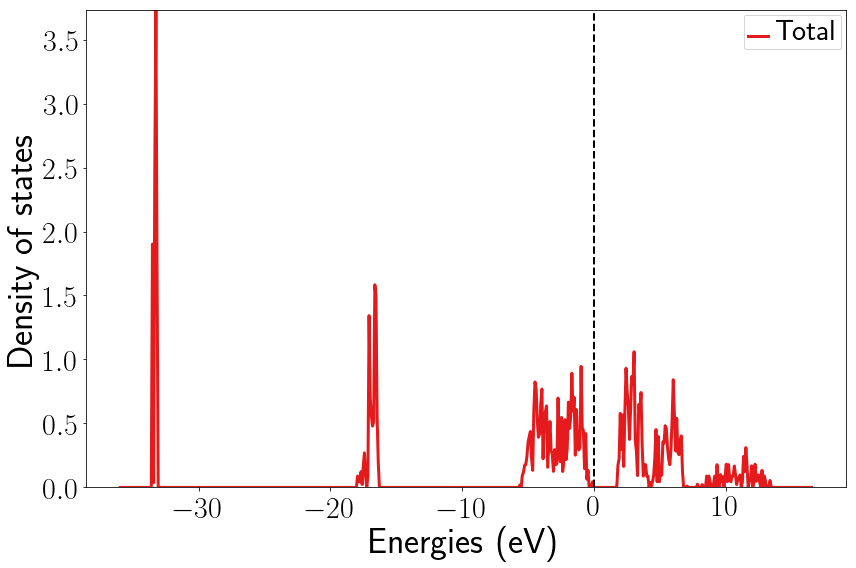

In [9]:
dp = DosPlotter()
dp.add_dos("Total",dos)
dp.get_plot().show()

# Exercise: Plot the total DOS for the TiO2 Elemental DOS'es shown above

Plot the total and elemental DOSes all together

dp = _______
for el,e_dos in dos_elemns.items():
    ________
    
___________

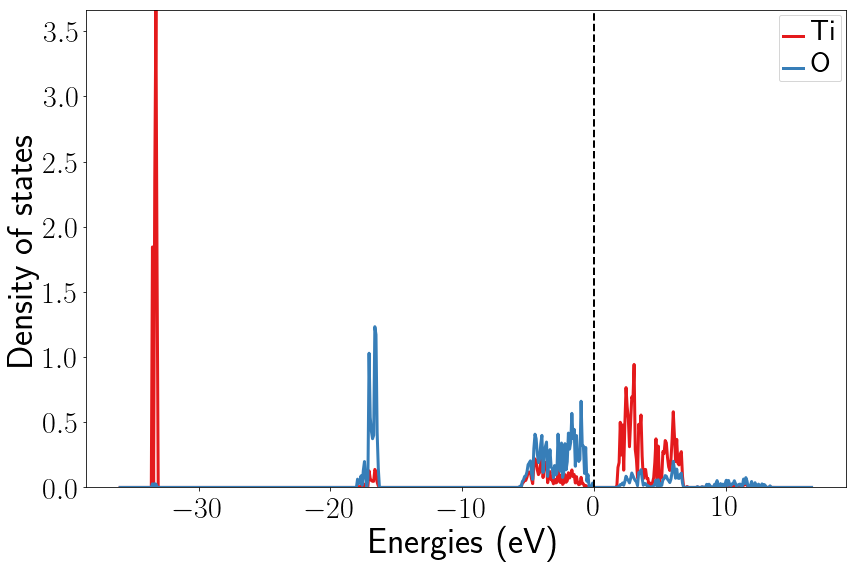

In [10]:
# Answer
dp = DosPlotter()
for el,e_dos in dos_elemns.items():
    dp.add_dos(str(el),e_dos)
    
dp.get_plot().show()